In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# MY-SQL - connection
%pip install --user sqlalchemy pymysql python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sqlalchemy
import pymysql
from dotenv import load_dotenv

print("All libraries are working perfectly!")

All libraries are working perfectly!


In [21]:
from sqlalchemy import create_engine
import pandas as pd

# ---------- MySQL connection details ----------
username = "root"
password = "sakshidhoni7"
host = "127.0.0.1"
port = "3306"
database = "fintech_database"

# ---------- Create SQLAlchemy engine ----------
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

pd.read_sql("SELECT 1", engine)


# ---------- Write your DataFrame to MySQL ----------
customer_df = pd.read_sql(
    "SELECT * FROM vw_customer_performance",
    engine
)

product_df = pd.read_sql(
    "SELECT * FROM vw_pillar1_product_performance",
    engine
)
revenue_df = pd.read_sql(
    "SELECT * FROM vw_pillar1_revenue_time_series",
    engine
)



In [22]:
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              15000 non-null  object        
 1   gender                   15000 non-null  object        
 2   city                     15000 non-null  object        
 3   state                    15000 non-null  object        
 4   education_level          15000 non-null  object        
 5   marital_status           15000 non-null  object        
 6   signup_date              15000 non-null  datetime64[ns]
 7   acquisition_channel      15000 non-null  object        
 8   campaign_id              15000 non-null  object        
 9   employment_type          15000 non-null  object        
 10  customer_type            15000 non-null  object        
 11  age                      15000 non-null  int64         
 12  age_bucket               15000 n

In [23]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_type                  5 non-null      object 
 1   total_transactions            5 non-null      int64  
 2   unique_customers              5 non-null      int64  
 3   total_fee_revenue             5 non-null      float64
 4   total_revenue_amount          5 non-null      float64
 5   total_cashback_given          5 non-null      float64
 6   net_transaction_revenue       5 non-null      float64
 7   avg_revenue_per_transaction   5 non-null      float64
 8   avg_cashback_per_transaction  5 non-null      float64
 9   product_efficiency_flag       5 non-null      object 
dtypes: float64(6), int64(2), object(2)
memory usage: 532.0+ bytes


In [24]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yearmonth                 36 non-null     object 
 1   active_customers          36 non-null     int64  
 2   net_transaction_revenue   36 non-null     float64
 3   interest_revenue          36 non-null     float64
 4   total_revenue             36 non-null     float64
 5   mom_revenue_change        35 non-null     float64
 6   mom_growth_pct            35 non-null     float64
 7   cumulative_total_revenue  36 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
customer_df[['tenure_days', 'net_transaction_revenue']].describe()


,tenure_days,net_transaction_revenue
count,15000.000000,15000.000000
mean,559.013600,306.680930
std,316.062688,149.500554
min,13.000000,-43.880000
25%,286.000000,198.640000
50%,560.500000,294.130000
75%,833.000000,399.622500
max,1108.000000,1071.710000


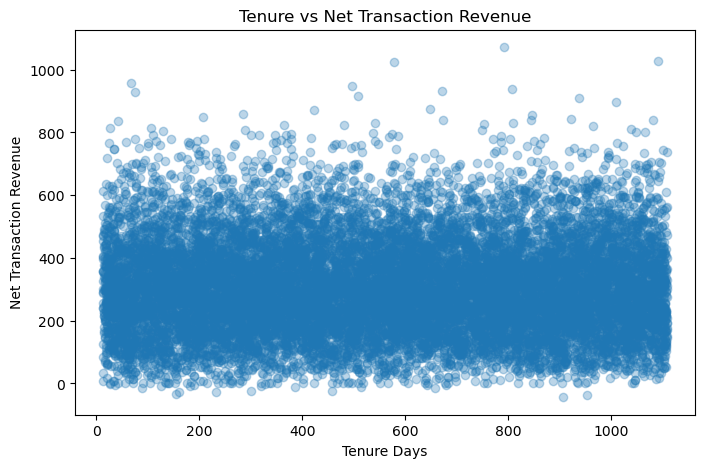

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(
    customer_df['tenure_days'],
    customer_df['net_transaction_revenue'],
    alpha=0.3
)
plt.xlabel('Tenure Days')
plt.ylabel('Net Transaction Revenue')
plt.title('Tenure vs Net Transaction Revenue')
plt.show()


In [10]:
customer_df['tenure_days'].corr(
    customer_df['net_transaction_revenue']
)


np.float64(-0.0018542117486748018)

In [11]:
customer_df['tenure_bucket'] = pd.cut(
    customer_df['tenure_days'],
    bins=[0, 90, 180, 365, 730, customer_df['tenure_days'].max()],
    labels=['<3m', '3–6m', '6–12m', '1–2y', '2y+']
)


In [12]:
customer_df.groupby('tenure_bucket')['net_transaction_revenue'].median()


C:\Users\SANKEERTHANA\AppData\Local\Temp\ipykernel_12240\4074049837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_df.groupby('tenure_bucket')['net_transaction_revenue'].median()


tenure_bucket
<3m      287.550
3–6m     301.560
6–12m    293.900
1–2y     295.980
2y+      291.855
Name: net_transaction_revenue, dtype: float64

C:\Users\SANKEERTHANA\AppData\Local\Temp\ipykernel_12240\1848153151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_df.groupby('tenure_bucket')['net_transaction_revenue'].median().plot(


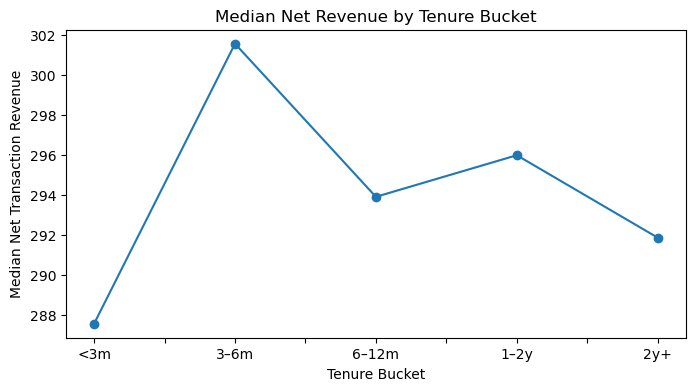

In [13]:
customer_df.groupby('tenure_bucket')['net_transaction_revenue'].median().plot(
    kind='line',
    marker='o',
    figsize=(8,4),
    title='Median Net Revenue by Tenure Bucket'
)
plt.xlabel('Tenure Bucket')
plt.ylabel('Median Net Transaction Revenue')
plt.show()


In [14]:
numeric_cols = [
    'tenure_days',
    'age',                     # only if raw income exists
    'net_transaction_revenue',
    'interest_revenue',
    'total_revenue'
]

corr_matrix = customer_df[numeric_cols].corr()
corr_matrix


,tenure_days,age,net_transaction_revenue,interest_revenue,total_revenue
tenure_days,1.000000,0.002082,-0.001854,0.002942,0.002908
age,0.002082,1.000000,-0.007819,0.007683,0.007539
net_transaction_revenue,-0.001854,-0.007819,1.000000,-0.015313,0.003210
interest_revenue,0.002942,0.007683,-0.015313,1.000000,0.999828
total_revenue,0.002908,0.007539,0.003210,0.999828,1.000000


In [15]:
income_summary = (
    customer_df
    .groupby('income_bucket')['net_transaction_revenue']
    .median()
    .sort_values(ascending=False)
)

income_summary


income_bucket
High      297.00
Medium    294.04
Low       289.14
Name: net_transaction_revenue, dtype: float64

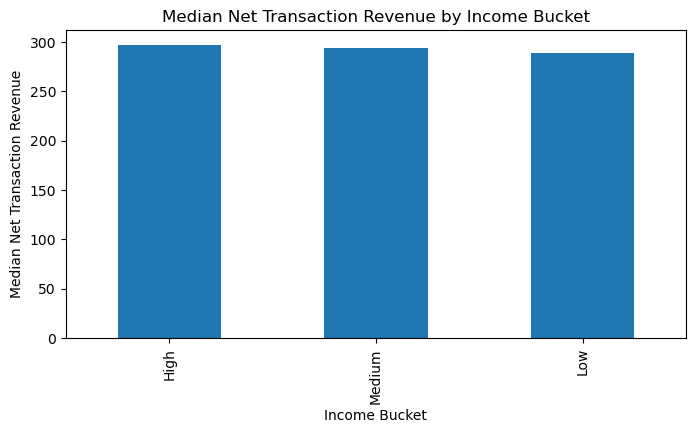

In [16]:
income_summary.plot(
    kind='bar',
    figsize=(8,4),
    title='Median Net Transaction Revenue by Income Bucket'
)

plt.xlabel('Income Bucket')
plt.ylabel('Median Net Transaction Revenue')
plt.show()


In [17]:
channel_summary = (
    customer_df
    .groupby('acquisition_channel')['net_transaction_revenue']
    .median()
    .sort_values(ascending=False)
)

channel_summary


acquisition_channel
Referral    297.130
Organic     297.035
Ads         293.365
Partner     290.120
Name: net_transaction_revenue, dtype: float64

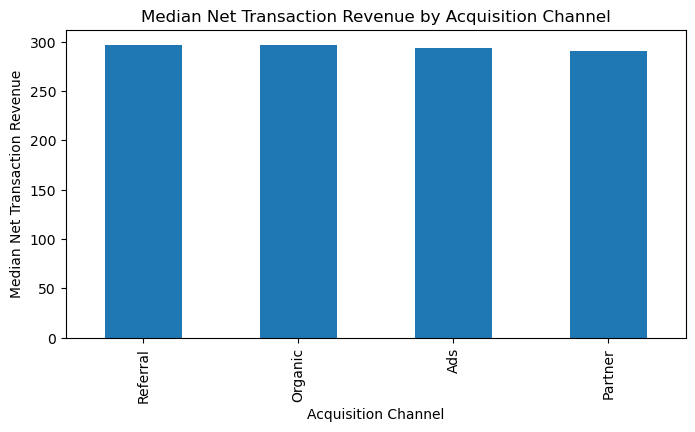

In [18]:
channel_summary.plot(
    kind='bar',
    figsize=(8,4),
    title='Median Net Transaction Revenue by Acquisition Channel'
)

plt.xlabel('Acquisition Channel')
plt.ylabel('Median Net Transaction Revenue')
plt.show()


In [19]:
product_numeric_cols = [
    'total_transactions',
    'unique_customers',
    'total_fee_revenue',
    'total_revenue_amount',
    'total_cashback_given',
    'net_transaction_revenue',
    'avg_revenue_per_transaction',
    'avg_cashback_per_transaction'
]

product_corr = product_df[product_numeric_cols].corr()
product_corr


,total_transactions,unique_customers,total_fee_revenue,total_revenue_amount,total_cashback_given,net_transaction_revenue,avg_revenue_per_transaction,avg_cashback_per_transaction
total_transactions,1.000000,0.967494,0.999990,0.999956,0.999997,0.999968,-0.150430,-0.161376
unique_customers,0.967494,1.000000,0.967044,0.967704,0.967940,0.967069,-0.175563,-0.014424
total_fee_revenue,0.999990,0.967044,1.000000,0.999939,0.999981,0.999972,-0.149507,-0.163036
total_revenue_amount,0.999956,0.967704,0.999939,1.000000,0.999938,0.999987,-0.141823,-0.167954
total_cashback_given,0.999997,0.967940,0.999981,0.999938,1.000000,0.999947,-0.152505,-0.158829
net_transaction_revenue,0.999968,0.967069,0.999972,0.999987,0.999947,1.000000,-0.142707,-0.168510
avg_revenue_per_transaction,-0.150430,-0.175563,-0.149507,-0.141823,-0.152505,-0.142707,1.000000,-0.839248
avg_cashback_per_transaction,-0.161376,-0.014424,-0.163036,-0.167954,-0.158829,-0.168510,-0.839248,1.000000


In [20]:
product_txn = (
    product_df
    .set_index('product_type')['total_transactions']
    .sort_values(ascending=False)
)

product_txn


product_type
UPI          40675
Wallet       17746
BNPL         13625
Card Bill     9083
EMI           8871
Name: total_transactions, dtype: int64

In [ ]:
 ** Python Analysis Roadmap (What We’ll Do Now)

We’ll do 3 small but powerful analyses:

✅ Analysis 1: Revenue Distribution (Customer-Level)

Shows concentration risk & ARPU importance

✅ Analysis 2: Revenue Concentration Metrics

Quantifies top customers’ impact

✅ Analysis 3: Product-Level Revenue Distribution

Supports product mix what-if **

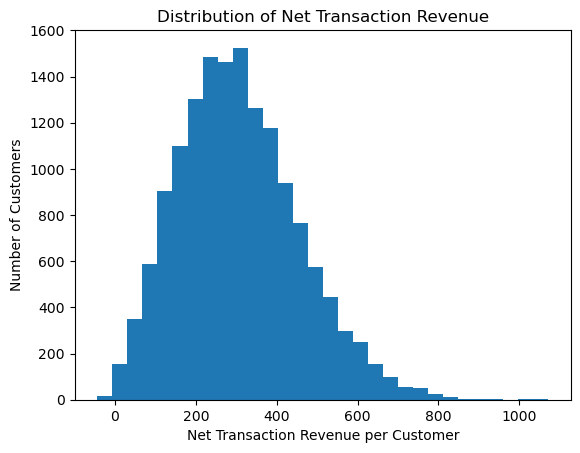

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Distribution of net transaction revenue
plt.figure()
plt.hist(customer_df['net_transaction_revenue'], bins=30)
plt.xlabel('Net Transaction Revenue per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Net Transaction Revenue')
plt.show()


In [26]:
# Sort customers by revenue
sorted_rev = customer_df.sort_values(
    by='net_transaction_revenue', ascending=False
)

sorted_rev['cum_revenue'] = sorted_rev['net_transaction_revenue'].cumsum()
total_revenue = sorted_rev['net_transaction_revenue'].sum()
sorted_rev['cum_share'] = sorted_rev['cum_revenue'] / total_revenue

# Revenue share of top 10% customers
top_10_index = int(0.1 * len(sorted_rev))
top_10_share = sorted_rev.iloc[top_10_index - 1]['cum_share']

top_10_share


np.float64(0.19445301016923353)

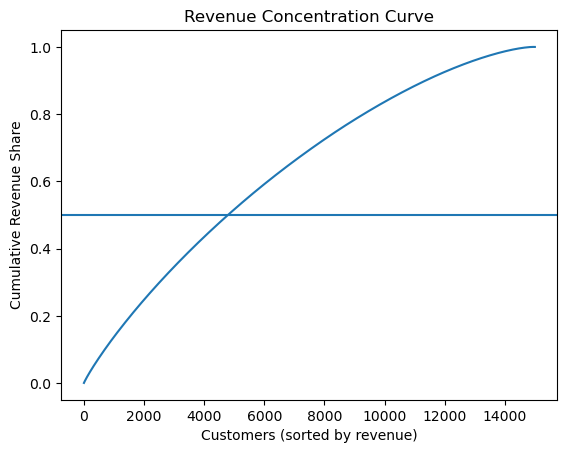

In [27]:
plt.figure()
plt.plot(sorted_rev['cum_share'].values)
plt.axhline(0.5)
plt.xlabel('Customers (sorted by revenue)')
plt.ylabel('Cumulative Revenue Share')
plt.title('Revenue Concentration Curve')
plt.show()


In [28]:
product_df[['product_type',
            'total_transactions',
            'net_transaction_revenue',
            'avg_revenue_per_transaction',
            'product_efficiency_flag']]


,product_type,total_transactions,net_transaction_revenue,avg_revenue_per_transaction,product_efficiency_flag
0,BNPL,13625,704337.07,51.69,Low Volume – High Margin
1,Card Bill,9083,462139.13,50.88,Balanced
2,EMI,8871,455543.46,51.35,Low Volume – High Margin
3,UPI,40675,2077948.97,51.09,High Volume – Low Margin
4,Wallet,17746,900245.32,50.73,Balanced


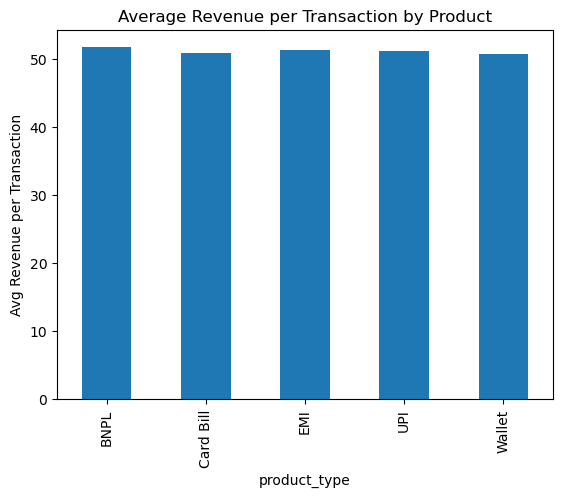

In [29]:
product_df.set_index('product_type')['avg_revenue_per_transaction'].plot(kind='bar')
plt.title('Average Revenue per Transaction by Product')
plt.ylabel('Avg Revenue per Transaction')
plt.show()


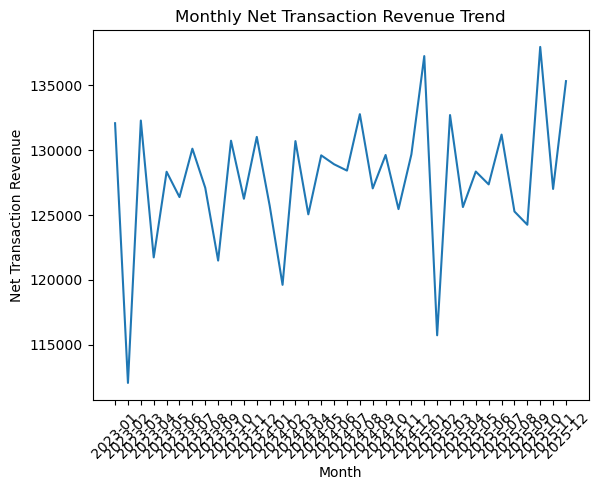

In [30]:
plt.figure()
plt.plot(revenue_df['yearmonth'], revenue_df['net_transaction_revenue'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Net Transaction Revenue')
plt.title('Monthly Net Transaction Revenue Trend')
plt.show()


In [31]:
# Base revenue metrics
current_net_revenue = customer_df['net_transaction_revenue'].sum()
current_interest_revenue = customer_df['interest_revenue'].sum()

current_total_revenue = current_net_revenue + current_interest_revenue

current_net_revenue, current_interest_revenue, current_total_revenue


(np.float64(4600213.95),
 np.float64(20107408.24),
 np.float64(24707622.189999998))

In [32]:
scenarios = {
    "Base": {
        "arpu_increase": 0.00,
        "product_mix_uplift": 0.00,
        "interest_realization": 0.00
    },
    "Conservative": {
        "arpu_increase": 0.05,      # +5% ARPU
        "product_mix_uplift": 0.03, # +3% net revenue
        "interest_realization": 0.05
    },
    "Realistic": {
        "arpu_increase": 0.10,      # +10% ARPU
        "product_mix_uplift": 0.05, # +5% net revenue
        "interest_realization": 0.10
    },
    "Optimistic": {
        "arpu_increase": 0.15,      # +15% ARPU
        "product_mix_uplift": 0.08, # +8% net revenue
        "interest_realization": 0.15
    }
}


In [33]:
results = []

for scenario, params in scenarios.items():
    net_rev = current_net_revenue * (1 + params["arpu_increase"])
    net_rev *= (1 + params["product_mix_uplift"])
    
    interest_rev = current_interest_revenue * (1 + params["interest_realization"])
    
    total_rev = net_rev + interest_rev
    
    uplift_pct = (total_rev - current_total_revenue) / current_total_revenue * 100
    
    results.append({
        "Scenario": scenario,
        "Projected_Total_Revenue": round(total_rev, 2),
        "Revenue_Uplift_%": round(uplift_pct, 2)
    })

scenario_df = pd.DataFrame(results)
scenario_df


,Scenario,Projected_Total_Revenue,Revenue_Uplift_%
0,Base,24707622.19,0.00
1,Conservative,26087910.04,5.59
2,Realistic,27431396.18,11.02
3,Optimistic,28836985.20,16.71


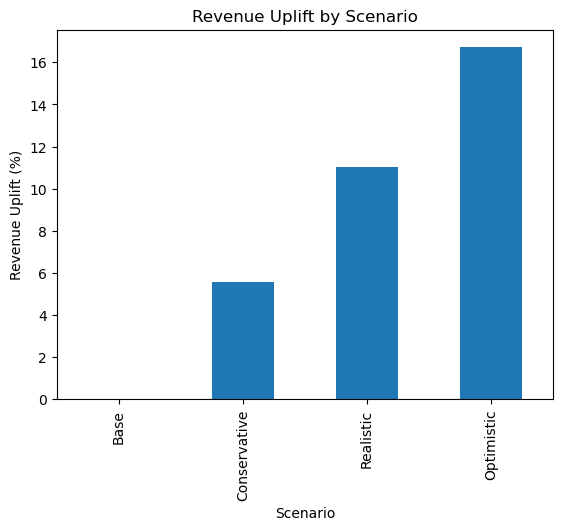

In [34]:
scenario_df.set_index("Scenario")["Revenue_Uplift_%"].plot(kind='bar')
plt.title("Revenue Uplift by Scenario")
plt.ylabel("Revenue Uplift (%)")
plt.show()
